# NLP

## EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [115]:
data = pd.read_csv('data_com2.csv', index_col=False, delimiter = ',')
data.head()

,note,commentaire
0,4.0,une bonne suite pour les aventures de sonic au...
1,5.0,Cette suite de sonic est incroyable !Le fan qu...
2,4.5,Très bon film ont retrouve ce qui fait l'espri...
3,4.0,"Super film de ouf, le fait que Knuckles soit d..."
4,3.0,Malgré deux nouveaux personnages de l'univers ...


In [116]:
data.isna().sum()

note           0
commentaire    2
dtype: int64

In [117]:
data.dropna(inplace=True)
data.isna().sum()

note           0
commentaire    0
dtype: int64

In [118]:
data.loc[(data.note>3),'sentiment']=1
data.loc[(data.note<=3),'sentiment']=0
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8034 entries, 0 to 8035
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   note         8034 non-null   float64
 1   commentaire  8034 non-null   object 
 2   sentiment    8034 non-null   float64
dtypes: float64(2), object(1)
memory usage: 251.1+ KB


Text(0.5, 1.0, 'répartition par sentiment')

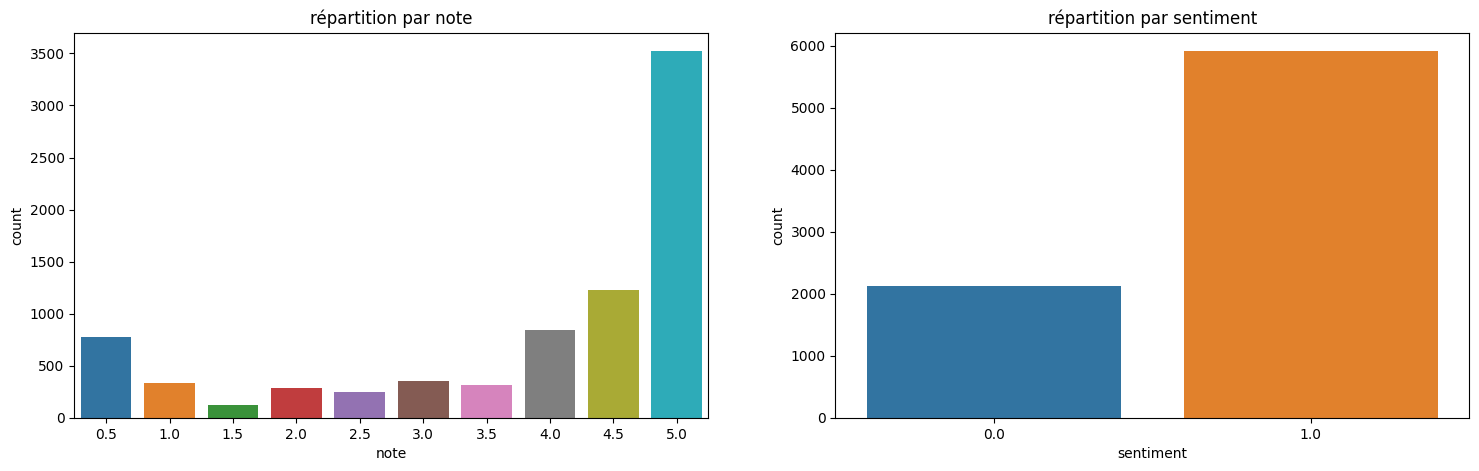

In [105]:
f, ax = plt.subplots(1, 2, figsize=(18, 5))
sns.countplot(x = data.note, data=data, ax=ax[0])
ax[0].set_title("répartition par note")
sns.countplot(x = data.sentiment, data=data, ax=ax[1])
ax[1].set_title("répartition par sentiment")

In [106]:
pd.crosstab(data.note, data.sentiment, margins=True).style.background_gradient(cmap='summer_r')

sentiment,0.000000,1.000000,All
note,,,
0.500000,779,0,779
1.000000,331,0,331
1.500000,121,0,121
2.000000,287,0,287
2.500000,244,0,244
3.000000,357,0,357
3.500000,0,317,317
4.000000,0,842,842
4.500000,0,1231,1231


### tokenisation + standardisation

In [6]:
import spacy
nlp = spacy.load("fr_core_news_sm")
import re

In [120]:
def standardize_text(donnees):
    '''enlève les nombres, les symboles spéciaux, les adresses http, et met tout en minuscule'''
    donnees = re.sub(r"http\S+", "", donnees)
    donnees = re.sub(r"http", "", donnees)
    donnees = re.sub(r"[?!:..;,/%@()<>=+*'_-]+"," ", donnees)  
    donnees = re.sub(r"[0-9]", "", donnees)
    donnees = donnees.lower()
    return donnees

In [121]:
def tokenize(sentence):
    '''tokenise le commentaire'''
    doc = nlp(sentence)
    return [X.text for X in doc if X.text != " "]

In [122]:
data['token'] = data.commentaire
i = 0
for sentence in data['token']:
    data_standard = standardize_text(sentence)
    data_token = tokenize(data_standard)
    if data_token != []:
        data.token[i] = data_token
    else:
        data.token[i] = 'cellule vide'
    i += 1

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_15232\1360732534.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.token[i] = data_token
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_15232\1360732534.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.token[i] = 'cellule vide'
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_15232\1360732534.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.token[i] = data_tok

In [47]:
# data.token = [standardize_text(com) for com in data.commentaire]
# data.token = [tokenize(com) for com in data.commentaire]

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_2676\3101260134.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.token = [standardize_text(com) for com in data.commentaire]


In [123]:
data.shape

(8034, 4)

In [124]:
data.loc[data.token=='cellule vide',:]

,note,commentaire,sentiment,token
2927,3.0,**********************************************...,0.0,cellule vide
3211,0.5,?????????????????????????!!!!!!!!!!!!!!!!!!!!!...,0.0,cellule vide
4073,3.5,.................................................,1.0,cellule vide


In [125]:
data.drop([data.index[4073]], inplace= True)

In [126]:
data.drop([data.index[3211]], inplace= True)

In [127]:
data.drop([data.index[2927]], inplace= True)

In [128]:
data.shape

(8031, 4)

In [129]:
data.loc[data.token=='cellule vide',:]

,note,commentaire,sentiment,token


## ML

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
y = data.sentiment
X = data.token

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)

(6424,) (1607,)


### Lemmatisation + stop words

In [133]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [134]:
def lemmatizer(X):
    stop_words = set(stopwords.words("french"))
    lemmatizer = FrenchLefffLemmatizer()
    for sentence in X:
        mask = X.apply(lambda x:x == sentence)
        i = X[mask].index[0]

        filtered_tokens = [token for token in sentence if token not in stop_words]

        lemmatized_tokens = [lemmatizer.lemmatize(token, 'n') for token in filtered_tokens]
        lemmatized_bis_tokens = [lemmatizer.lemmatize(token, 'v') for token in lemmatized_tokens]

        X[i] = lemmatized_bis_tokens
    return X

In [135]:
X_train = lemmatizer(X_train)
X_test = lemmatizer(X_test)

In [192]:
import joblib
# model_complet={ "X_train":X_train,
#                 "y_train":y_train,
#                 "X_test":X_test,
#                 "y_test":y_test
#                 }

# joblib.dump(model_complet, 'X_y_token.joblib')
X_train = joblib.load('X_y_token.joblib')['X_train']
y_train = joblib.load('X_y_token.joblib')['y_train']
X_test = joblib.load('X_y_token.joblib')['X_test']
y_test = joblib.load('X_y_token.joblib')['y_test']

In [193]:
print(y_train.value_counts())

1.0    4736
0.0    1688
Name: sentiment, dtype: int64


In [194]:
print(X_train.shape, y_train.shape)

(6424,) (6424,)


### Data augmentation - EDA synonym

In [186]:
from deep_translator import GoogleTranslator
import nlpaug.augmenter.word as naw

In [195]:
def synonym_aug(sequence): 
   
    sequence_str = ', '.join(sequence)
    aug = naw.SynonymAug(aug_src='wordnet', aug_p=0.2)
    translated = GoogleTranslator(target = 'en').translate(sequence_str)

    augmented_text = aug.augment(translated)
    
    if augmented_text == sequence_str:
        translated_bis = GoogleTranslator(target = 'en').translate(sequence_str)

        augmented_text_bis = aug.augment(translated_bis)
        translated_back_bis = GoogleTranslator(target = 'fr').translate(augmented_text_bis[0])

        return translated_back_bis.split(', ')

    translated_back = GoogleTranslator(target = 'fr').translate(augmented_text[0])    
    return translated_back    

In [196]:
for commentaire in X_train[y_train == 0]:
    com_join = ', '.join(commentaire)
    if len(com_join) < 4800:
        output_translate = synonym_aug(commentaire)  
        com_split = output_translate.split(', ')
        X_train = pd.concat([X_train,pd.Series([com_split], dtype=np.object_)])
        y_train = pd.concat([y_train,pd.Series(0, dtype = np.float64)]) 
    
        print(X_train.shape, y_train.shape)

(6425,) (6425,)
(6426,) (6426,)
(6427,) (6427,)
(6428,) (6428,)
(6429,) (6429,)
(6430,) (6430,)
(6431,) (6431,)
(6432,) (6432,)
(6433,) (6433,)
(6434,) (6434,)
(6435,) (6435,)
(6436,) (6436,)
(6437,) (6437,)
(6438,) (6438,)
(6439,) (6439,)
(6440,) (6440,)
(6441,) (6441,)
(6442,) (6442,)
(6443,) (6443,)
(6444,) (6444,)
(6445,) (6445,)
(6446,) (6446,)
(6447,) (6447,)
(6448,) (6448,)
(6449,) (6449,)
(6450,) (6450,)
(6451,) (6451,)
(6452,) (6452,)
(6453,) (6453,)
(6454,) (6454,)
(6455,) (6455,)
(6456,) (6456,)
(6457,) (6457,)
(6458,) (6458,)
(6459,) (6459,)
(6460,) (6460,)
(6461,) (6461,)
(6462,) (6462,)
(6463,) (6463,)
(6464,) (6464,)
(6465,) (6465,)
(6466,) (6466,)
(6467,) (6467,)
(6468,) (6468,)
(6469,) (6469,)
(6470,) (6470,)
(6471,) (6471,)
(6472,) (6472,)
(6473,) (6473,)
(6474,) (6474,)
(6475,) (6475,)
(6476,) (6476,)
(6477,) (6477,)
(6478,) (6478,)
(6479,) (6479,)
(6480,) (6480,)
(6481,) (6481,)
(6482,) (6482,)
(6483,) (6483,)
(6484,) (6484,)
(6485,) (6485,)
(6486,) (6486,)
(6487,) 

In [197]:
print(X_train.shape, y_train.shape)

(8111,) (8111,)


In [265]:
# import joblib
# model_complet={ "X_train":X_train,
#                 "y_train":y_train,
#                 "X_test":X_test,
#                 "y_test":y_test
#                 }

# joblib.dump(model_complet, 'X_y_token.joblib')
X_train = joblib.load('X_y_token.joblib')['X_train']
y_train = joblib.load('X_y_token.joblib')['y_train']
X_test = joblib.load('X_y_token.joblib')['X_test']
y_test = joblib.load('X_y_token.joblib')['y_test']

### Wordcloud

In [200]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [201]:
X_train_str = [' '.join(x) for x in X_train]

(-0.5, 399.5, 199.5, -0.5)

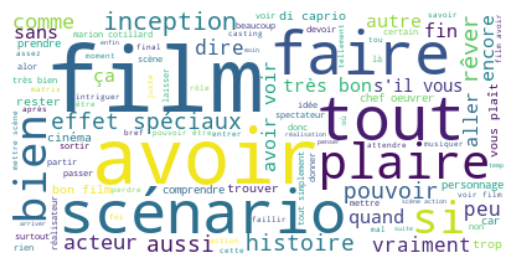

In [202]:
text = " ".join(com for com in X_train_str)

stopwords_wc = ['josé', 'garcia', 'mask', 'jamie', 'kennedy', 'tex', 'avery', 'loki', 'delon', 'alain', 'fabien', 'onteniente', 'chris', 'lewitt', 'gabriel', 'aghlon', 'odin', 'ibiza',
'nolan', 'christopher', 'élen']

wordcloud = WordCloud(stopwords=set(stopwords_wc), max_words=100, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [203]:
X_train_neg = [' '.join(x) for x in X_train[y_train== 0]]
X_train_pos = [' '.join(x) for x in X_train[y_train== 1]]

In [204]:
mots_neg, mots_pos, liste_mots_communs=[],[],[]
for i in X_train_neg:
    neg = i.split()
    mots_neg+=neg
for i in X_train_pos:
    pos = i.split()
    mots_pos+=pos

liste_mots_communs = list(set(mots_neg) & (set(mots_pos)))

In [205]:
stopwords_mc = stopwords_wc + liste_mots_communs

(-0.5, 511.5, 511.5, -0.5)

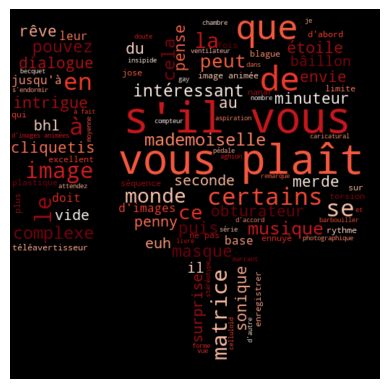

In [206]:
text_neg = " ".join(com for com in X_train_neg)

wordcloud_neg = WordCloud(stopwords=set(stopwords_mc), max_words=100, colormap='Reds', mask=np.array(Image.open("dislike.png"))).generate(text_neg)
wordcloud_neg.to_file("pouce_rouge_wc.png")
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")

(-0.5, 511.5, 511.5, -0.5)

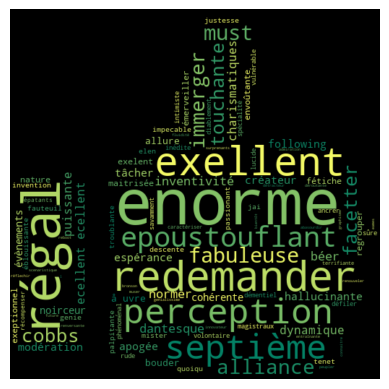

In [207]:
text_pos = " ".join(com for com in X_train_pos)

wordcloud_pos = WordCloud(stopwords=set(stopwords_mc), max_words=100, colormap='summer', mask=np.array(Image.open("like.png"))).generate(text_pos)
wordcloud_pos.to_file("pouce_vert_wc.png")
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")

In [257]:
import random

In [258]:
mots_neg_list = []
for mot in mots_neg:
    if mot in mots_pos:
        pass
    else:
        mots_neg_list.append(mot)

In [260]:
mots_neg_list += ['daube', 'chier', 'nanar', 'pourri', 'nul', 'navet', 'décevant', 'médiocre', 'débile', 'banal', 'juvénile', 'idiot', 'stupide', 'cliché', 'fade', 'chiant', 'pitoyable']
'navet' in mots_neg_list

True

In [293]:
mots_pos_list = []
for mot in mots_pos:
    if mot in mots_neg:
        pass
    else:
        mots_pos_list.append(mot)

In [294]:
while y_train.value_counts()[0] < 5000:
    new_com = random.choices(mots_neg_list, k = 200)
    X_train = pd.concat([X_train,pd.Series([new_com], dtype=np.object_)])
    y_train = pd.concat([y_train,pd.Series(0, dtype = np.float64)])

    print(X_train.shape, y_train.shape)

(9473,) (9473,)
(9474,) (9474,)
(9475,) (9475,)
(9476,) (9476,)
(9477,) (9477,)
(9478,) (9478,)
(9479,) (9479,)
(9480,) (9480,)
(9481,) (9481,)
(9482,) (9482,)
(9483,) (9483,)
(9484,) (9484,)
(9485,) (9485,)
(9486,) (9486,)
(9487,) (9487,)
(9488,) (9488,)
(9489,) (9489,)
(9490,) (9490,)
(9491,) (9491,)
(9492,) (9492,)
(9493,) (9493,)
(9494,) (9494,)
(9495,) (9495,)
(9496,) (9496,)
(9497,) (9497,)
(9498,) (9498,)
(9499,) (9499,)
(9500,) (9500,)
(9501,) (9501,)
(9502,) (9502,)
(9503,) (9503,)
(9504,) (9504,)
(9505,) (9505,)
(9506,) (9506,)
(9507,) (9507,)
(9508,) (9508,)
(9509,) (9509,)
(9510,) (9510,)
(9511,) (9511,)
(9512,) (9512,)
(9513,) (9513,)
(9514,) (9514,)
(9515,) (9515,)
(9516,) (9516,)
(9517,) (9517,)
(9518,) (9518,)
(9519,) (9519,)
(9520,) (9520,)
(9521,) (9521,)
(9522,) (9522,)
(9523,) (9523,)
(9524,) (9524,)
(9525,) (9525,)
(9526,) (9526,)
(9527,) (9527,)
(9528,) (9528,)
(9529,) (9529,)
(9530,) (9530,)
(9531,) (9531,)
(9532,) (9532,)
(9533,) (9533,)
(9534,) (9534,)
(9535,) 

In [295]:
while  y_train.value_counts()[1] < 5000:
    new_com = random.choices(mots_pos_list, k = 200)
    X_train = pd.concat([X_train,pd.Series([new_com], dtype=np.object_)])
    y_train = pd.concat([y_train,pd.Series(1, dtype = np.float64)])

In [296]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [297]:
X_train_vec = [' '.join(x) for x in X_train]
X_test_vec = [' '.join(x) for x in X_test]

In [298]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X_train_vec = vectorizer.fit_transform(X_train_vec)
X_test_vec = vectorizer.transform(X_test_vec)

In [299]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
cv = StratifiedKFold()

### LGBMClassifier

In [300]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [301]:
classifier = lgb.LGBMClassifier()

param_grid= {'boosting_type': ['bgdt', 'dart', 'goss']}
grid = GridSearchCV(classifier, param_grid, cv = cv)
grid.fit(X_train_vec, y_train)

c:\environnement\.venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\environnement\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\environnement\.venv\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "c:\environnement\.venv\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "c:\enviro

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LGBMClassifier(),
             param_grid={'boosting_type': ['bgdt', 'dart', 'goss']})

In [302]:
grid.best_estimator_

LGBMClassifier(boosting_type='goss')

In [303]:
grid.best_params_
classifier = grid.best_estimator_
classifier.score(X_test_vec, y_test)

0.8618543870566272

              precision    recall  f1-score   support

         0.0       0.80      0.65      0.71       431
         1.0       0.88      0.94      0.91      1176

    accuracy                           0.86      1607
   macro avg       0.84      0.79      0.81      1607
weighted avg       0.86      0.86      0.86      1607

Accuracy of LightGBM Model: 86.18543870566272 %


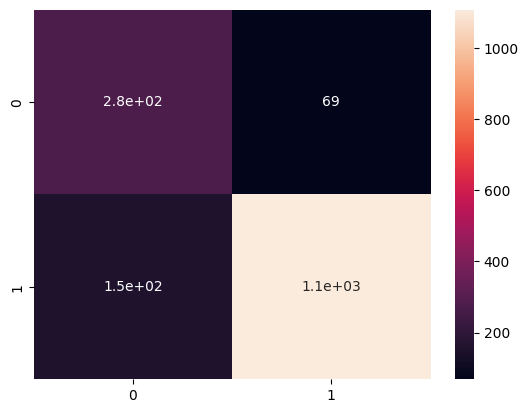

In [304]:
y_pred = classifier.predict(X_test_vec)
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_test, y_pred)
print(report)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)
print("Accuracy of LightGBM Model:", acc*100,"%")

### Logistic Regression

In [305]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [306]:
regressor = LogisticRegression()

In [307]:
param_grid= {'multi_class':['ovr'],
'random_state': [0],
'penalty': ['l1', 'l2'],
'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}
grid = GridSearchCV(regressor, param_grid, cv = cv)
grid.fit(X_train_vec, y_train)

c:\environnement\.venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\environnement\.venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\environnement\.venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\environnement\.venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\environnement\.venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\environnement\.venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed o

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'multi_class': ['ovr'], 'penalty': ['l1', 'l2'],
                         'random_state': [0],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [308]:
grid.best_estimator_

LogisticRegression(multi_class='ovr', random_state=0, solver='saga')

In [309]:
grid.best_params_
regressor = grid.best_estimator_
regressor.score(X_test_vec, y_test)

0.865588052271313

L'accuaracy score est de : 86.5588052271313


<AxesSubplot: >

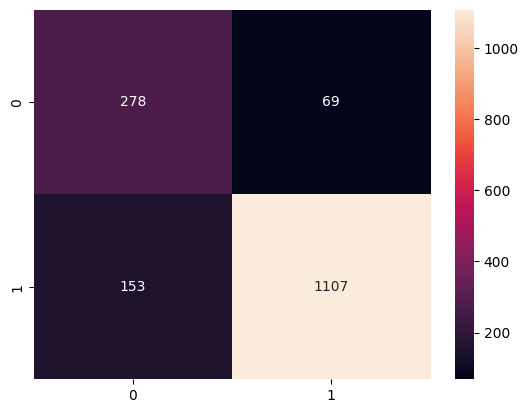

In [310]:
y_pred_reg = regressor.predict(X_test_vec)

acc_reg = accuracy_score(y_pred_reg, y_test)
print("L'accuaracy score est de :", acc_reg * 100)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='d')

## Essai

In [283]:
def standardize_phrase(donnees):
        donnees = donnees.replace(r"http\S+", "")
        donnees = donnees.replace(r"http", "")
        donnees = donnees.replace(r"@\S+", "")
        donnees = donnees.replace(r"[0-9(),;!:?@<>.=\'\`\"\-\_\n]", " ")
        donnees = donnees.replace(r"@", "at")
        donnees = donnees.lower()
        
        lemmatizer = FrenchLefffLemmatizer()
        corpus = []
        message = donnees.split()
        message =[word for word in message if word not in stopwords.words('french')]
        message = [lemmatizer.lemmatize(word, 'n') for word in message]
        message = [lemmatizer.lemmatize(word, 'v') for word in message]
        message = ' '.join(message)
        corpus.append(message)
        
        return corpus 


In [284]:
def test_com_classifier(com):
    com_standard = standardize_phrase(com)
    com_vector = vectorizer.transform(com_standard)
    print('Bien !' if classifier.predict(com_vector)[0] == 1 else 'pas bien !', "Réponse de Classifier")    
    print(classifier.predict_proba(com_vector))
    

In [285]:
def test_com_regressor(com):
    com_standard = standardize_phrase(com)
    com_vector = vectorizer.transform(com_standard)
    print('Bien !' if regressor.predict(com_vector)[0] == 1 else 'pas bien !', "Réponse de Regressor")    
    print(regressor.predict_proba(com_vector))

In [317]:
test = "ce film est vraiment pas mauvais, à mon grand étonnement !"
test_com_classifier(test)
test_com_regressor(test)

pas bien ! Réponse de Classifier
[[0.67348954 0.32651046]]
pas bien ! Réponse de Regressor
[[0.53703818 0.46296182]]


- 13/01/23 11:30 - Sans data augmentation ou équilibrage des deux classes et TfidfVectorizer + LGBMClassifier(utiliser dans le tuto), le résultat est de 87% !
- 13/01/23 13:40 - Même paramètre qu'au dessus, mais avec suppression des mots en commun entre les com + et -. Le model chutte à 80% ! à avoir si je garde ou non !
- 13/01/23 14:00 - Toujours sans data augmentation et sans équilibrage + model logisticRegression + mot en commun => 80%
- 13/01/23 14:20 - idem que précédemment, mais sans mot en commun => 84%
- 13/01/23 22:00 - data augmentation par back translation (qq prob pour le mettre en place et qui n'a pas finit, encore une erreur au bout de 45 min, début traduction allemand) => LGBMClassifier = 87% et logisticRegression = 89%
- 14/01/23 11:00 - data augmentation par back translation (après une 1h40, toujours pas finit, je stoppe avant, 4700 + pour 4200 -) => LGBMClassifier = 87% et logisticRegression = 89% (même résultat qu'hier !)
- 14/01/23 14:20 - data augmentation par back translation + synonym => LGBMClassifier = 87% et logisticRegression = 90% (arrondi à 0.1)
- 14/01/23 17:40 - data augmentation par back translation + synonym + création nouvelle phrase à partir des mots présents dans les com + et - => LGBMClassifier = 87.04% et logisticRegression = 90.09% 
- 15/01/23 07:40 - ajout de commentaire neg + étapes précédente => LGBMClassifier = 87.5% et logisticRegression = 89.3% 
- 15/01/22 08:10 - recherche des meilleurs hyper-paramètres => LGBMClassifier = 86.99% et logisticRegression = 89.3% 
- 17/01/23 20:00 - v2 => mis en place des tokens sans data augmentation => LGBMClassifier = 86.9% et logisticRegression = 86.6% 
- 18/01/23 11:30 - data augmentation par back translation synonym => LGBMClassifier = 85.8% et logisticRegression = 84.49% 
- 18/01/23 18:45 - data augmentation augmenté avec des créations de commentaires et des mots clés rajoutés au mot négatif => LGBMClassifier = 85.7% et logisticRegression = 86.6% 
- 18/01/23 18:45 - data augmentation augmenté avec des créations de commentaires pour atteindre 5000 dans les deux catégories => LGBMClassifier = 86.2% et logisticRegression = 86.5% 

In [84]:
'''from gensim.models import Word2Vec

word2vec = Word2Vec(X_train_token, min_count=1, window=1)
X_train_w2v = []
for sentence in X_train_token:
    X_train_w2v.append(np.mean([word2vec.wv[word] for word in sentence], axis=0))'''

c:\environnement\.venv\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\environnement\.venv\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
